특정 영화 팬이 관람할 21개의 영화 평점을 예측하고 실제 평점과 비교해보자

MovieLens 데이터셋
https://grouplens.org/datasets/movielens
평점 데이터(ratings.data)
- user_id, movie_id, rating, time
영화 데이터(movies.data)
- movie_id, title, genre
유저 데이터(users.data)
- user_id, gender, age, occupation, zipcode

user_id : 유저 번호
movie_id : 영화 번호
rating : 정수
time : 데이터 등록 시간
title : 영화 제목
genre : 장르
genger : 성별
age : 나이
occupation : 직업 - 개인정보1
zipcode : 주소 코드 - 개인정보2

MovieLens 데이터셋 읽기 
- '::'을 구분자로 하여 열을 구분하여 저장 

=> delimiter 를 이용해서 '::'을 구분할 수 있다.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

movie_df = pd.read_csv('./data/ml-1m/movies8.dat', 
                       names=['movie_id' , 'title' , 'genre'], delimiter = '::')
user_df = pd.read_csv('./data/ml-1m/users.dat', 
                       names=['user_id' , 'gender' , 'age','occupation', 'zipcode'], delimiter = '::')
rating_df =pd.read_csv('./data/ml-1m/ratings.dat', 
                       names=['user_id' , 'movie_id' , 'rating','time'], delimiter = '::')


In [3]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genre     3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


- unique() 메소드 : 시리즈 객체에서 고유한 것들을 골라준다
- len() 메소드 : 개수 

In [4]:
print('total number of movie in data:',len(movie_df['movie_id'].unique()))

total number of movie in data: 3883


##  연도별 개봉작 수 출력 하기
- 영화 제목과 개봉년도 분리하기
+ 개봉작이 가장 많은 Top 10 개봉년도 출력하기

In [5]:
movie_df['year'] = movie_df['title'].apply(lambda x: x[-5:-1]) # -5 ,-4, -3,-2, -1

In [6]:
movie_df['title'] = movie_df['title'].apply(lambda x: x[:-7])

In [7]:
movie_df.head()

,movie_id,title,genre,year
0,1,Toy Story,Animation|Children's|Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama,1995
4,5,Father of the Bride Part II,Comedy,1995


In [8]:
year_counts = movie_df['year'].value_counts()[:10]

for i ,(year,count) in enumerate(year_counts.iteritems(),1):
    print('Top',i,':',year,'(',count,')')

Top 1 : 1996 ( 345 )
Top 2 : 1995 ( 342 )
Top 3 : 1998 ( 337 )
Top 4 : 1997 ( 315 )
Top 5 : 1999 ( 283 )
Top 6 : 1994 ( 257 )
Top 7 : 1993 ( 165 )
Top 8 : 2000 ( 156 )
Top 9 : 1986 ( 104 )
Top 10 : 1992 ( 102 )


## 연대별 개봉작 수 시각화하기
- 개봉년도 피처에서 연대 정보 생성
+ 연대별로 개봉작 수를 합산하여 시각화

In [9]:
movie_df['years'] = movie_df['year'].apply(lambda x:x[:3] + '0') # [:-1]+'0'

In [10]:
movie_df.head()

,movie_id,title,genre,year,years
0,1,Toy Story,Animation|Children's|Comedy,1995,1990
1,2,Jumanji,Adventure|Children's|Fantasy,1995,1990
2,3,Grumpier Old Men,Comedy|Romance,1995,1990
3,4,Waiting to Exhale,Comedy|Drama,1995,1990
4,5,Father of the Bride Part II,Comedy,1995,1990


In [11]:
movie_df.tail(10)

,movie_id,title,genre,year,years
3873,3943,Bamboozled,Comedy,2000,2000
3874,3944,Bootmen,Comedy|Drama,2000,2000
3875,3945,Digimon: The Movie,Adventure|Animation|Children's,2000,2000
3876,3946,Get Carter,Action|Drama|Thriller,2000,2000
3877,3947,Get Carter,Thriller,1971,1970
3878,3948,Meet the Parents,Comedy,2000,2000
3879,3949,Requiem for a Dream,Drama,2000,2000
3880,3950,Tigerland,Drama,2000,2000
3881,3951,Two Family House,Drama,2000,2000
3882,3952,"Contender, The",Drama|Thriller,2000,2000


In [12]:
years_counts_data = movie_df['years'].value_counts().sort_index()

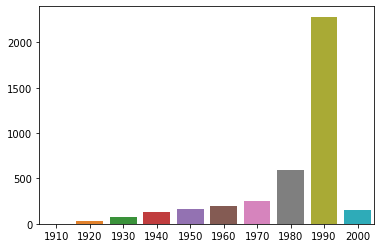

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(years_counts_data.index,years_counts_data.values)
plt.show()

## 영화 장르 분석하기
- 영화 데이터의 genre 정보를 파싱(parsing)
    - spiit() 메소드 : 분할자를 구별해서 리스트 형태로 변환
+ 영화 장르 카운터를 dictionary 자료형으로 구현

dictionary = (key,value)

In [14]:
"dog, cat, baby".split(',')

['dog', ' cat', ' baby']

In [15]:
'Advnture|Animation|Children'.split('|')

['Advnture', 'Animation', 'Children']

In [16]:
genre_counts_dict = {}

for index, row in movie_df.iterrows():
    
    parsed_genre = row['genre'].split('|')
    for genre in parsed_genre:
        if genre in genre_counts_dict:
            genre_counts_dict[genre] +=1
        else:
            genre_counts_dict[genre] = 1

genre_counts_dict

{'Animation': 105,
 "Children's": 251,
 'Comedy': 1200,
 'Adventure': 283,
 'Fantasy': 68,
 'Romance': 471,
 'Drama': 1603,
 'Action': 503,
 'Crime': 211,
 'Thriller': 492,
 'Horror': 343,
 'Sci-Fi': 276,
 'Documentary': 127,
 'War': 143,
 'Musical': 114,
 'Mystery': 106,
 'Film-Noir': 44,
 'Western': 68}

## 영화 장르 분석결과 시각화
- dictionary자료형의 키와 값을 list 자료형으로 변환
    - keys() 메소드
    - values() 메소드

In [17]:
genre_counts_dict.keys()

dict_keys(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir', 'Western'])

In [18]:
genre_counts_dict.values()

dict_values([105, 251, 1200, 283, 68, 471, 1603, 503, 211, 492, 343, 276, 127, 143, 114, 106, 44, 68])

[]

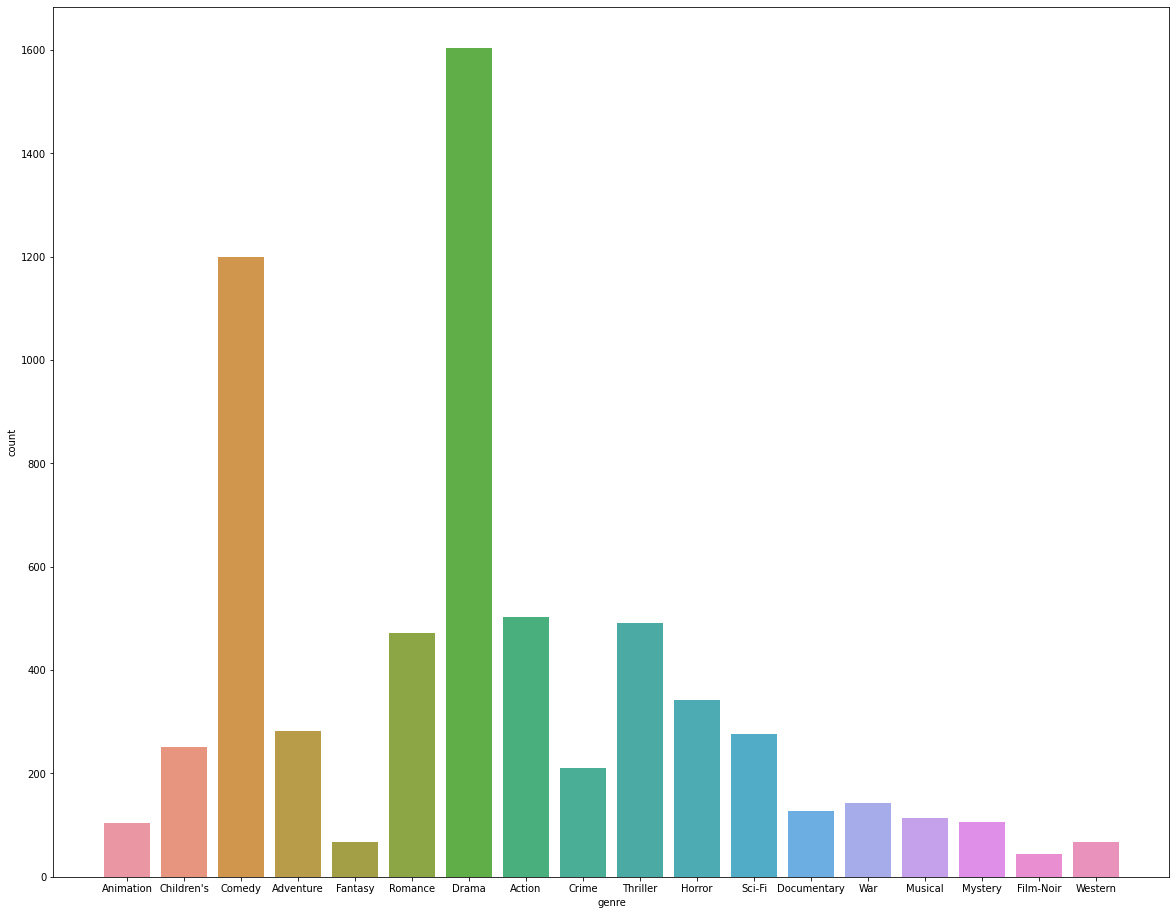

In [19]:
plt.rcParams['figure.figsize'] = (20,16)
sns.barplot(list(genre_counts_dict.keys()),list(genre_counts_dict.values()))
plt.xlabel('genre')
plt.ylabel('count')
plt.plot()

## 전체 사용자 수 탐색
- Series.nunique() 메소드
    - 시리즈 객체의 고유한 원소 수를 반환
- Series.value_counts() 메소드
    - sort = True
    - ascending(오름차순) = False

In [20]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zipcode     6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [21]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype
---  ------    --------------    -----
 0   user_id   1000209 non-null  int64
 1   movie_id  1000209 non-null  int64
 2   rating    1000209 non-null  int64
 3   time      1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [22]:
len(user_df['user_id'].unique())

6040

In [23]:
user_df['user_id'].head()

0    1
1    2
2    3
3    4
4    5
Name: user_id, dtype: int64

In [24]:
user_df['user_id'].nunique()

6040

In [25]:
gender_count = user_df['gender'].value_counts()
gender_count

M    4331
F    1709
Name: gender, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

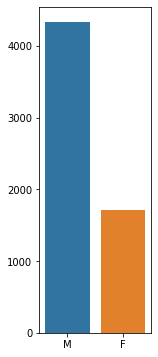

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(2,6))
sns.barplot(gender_count.index,gender_count.values)
plt.show

## 전체 사용자의 연령대 탐색
+ 사용자의 연령대 피처(ages)를 추가
+ series.sort_index()메소드
    - 인덱스 순으로 시리즈를 정렬
    - ascending = True
+ Series.rename()메소드
    - 시리즈 객체의 인덱스 이름을 변경
    - index : dict- like or function
    - inplace = false

In [27]:
user_df['age_group'] = user_df['age'].apply(lambda x : x // 10 * 10)

ages_count = user_df['age_group'].value_counts(sort=False)
ages_count = ages_count.sort_index()
ages_count.rename(index = {0:'outlier'},inplace=True)

In [28]:
ages_count

outlier     222
10         1103
20         2096
30         1193
40          550
50          876
Name: age_group, dtype: int64

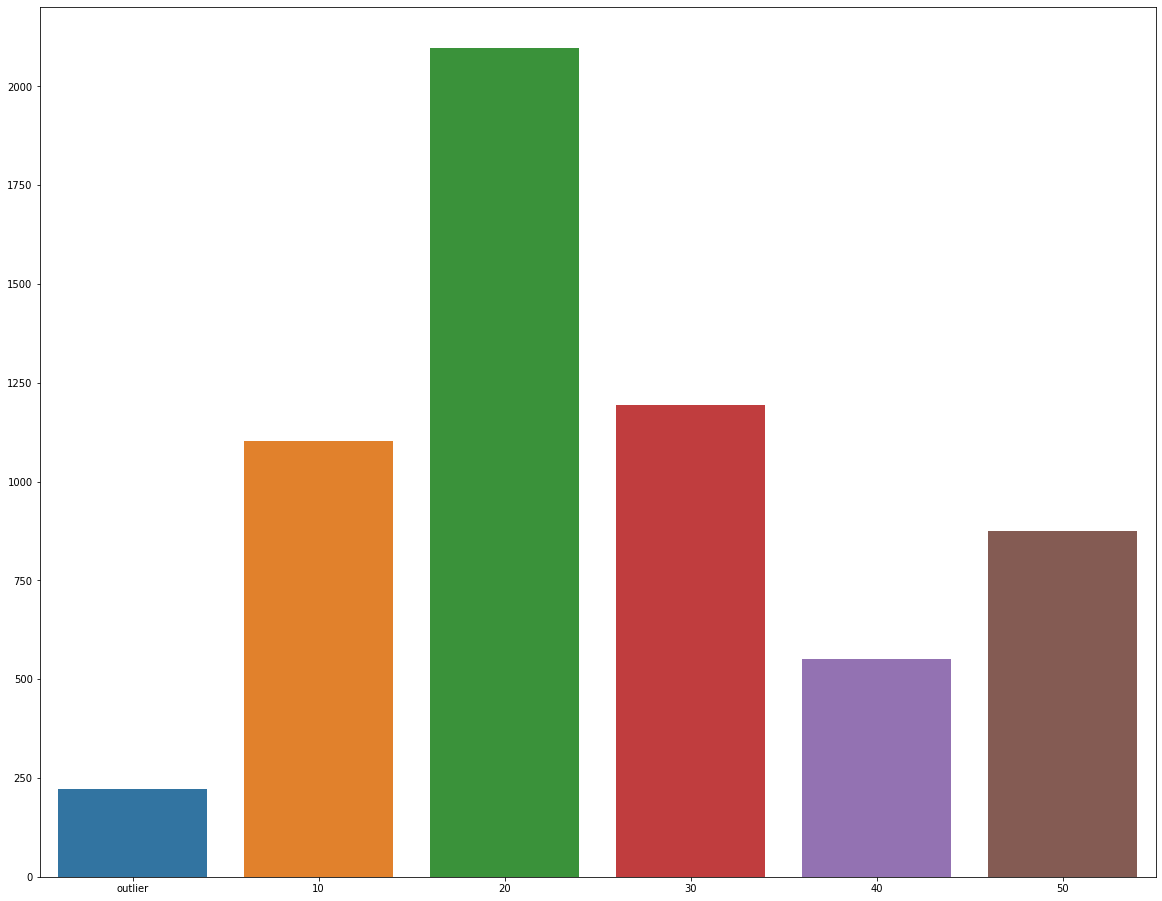

In [29]:
sns.barplot(ages_count.index,ages_count.values)
plt.show()

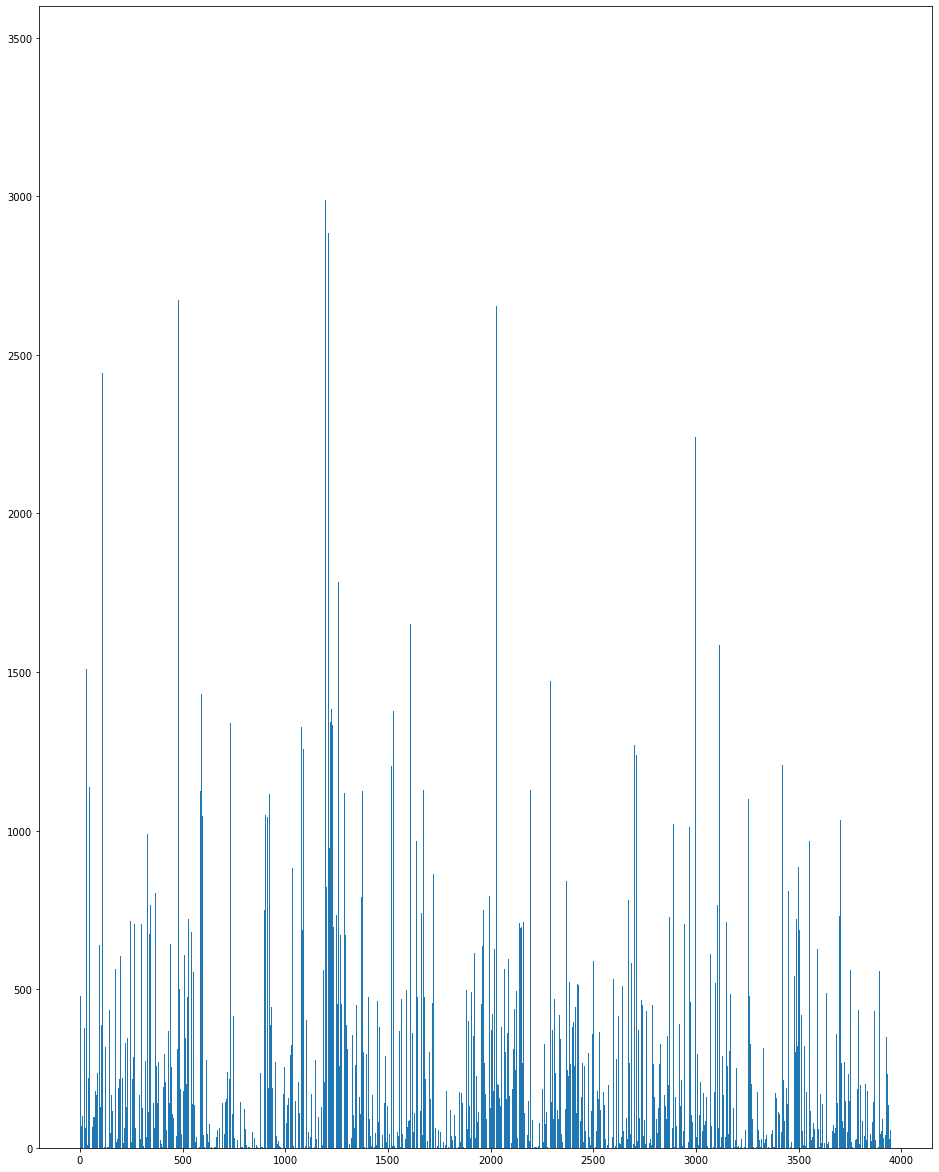

In [30]:
movie_rating_count = rating_df.groupby('movie_id')['rating'].count()

plt.figure(figsize=(16,21))
plt.bar(movie_rating_count.index,movie_rating_count.values)
plt.show()

In [31]:
movie_rating_count.idxmax()

2858

In [32]:
movie_rating_count.max()

3428

## 영화 별 평점 수(평가받은 횟수)탐색
- 영화 별 평점 횟수를 탐색
- DataFrame.groupby()메소드
    - DataFrameGroupBy 객체 반환
- DataFrameGroupBy.count() 메소드
    - 각 그룹에 속한(결측치를 제외한) 값의 개수를 반환
- pyplot.hist() 함수
    - 히스토그램의 시각화
    - bins =10 :구간(계급)수

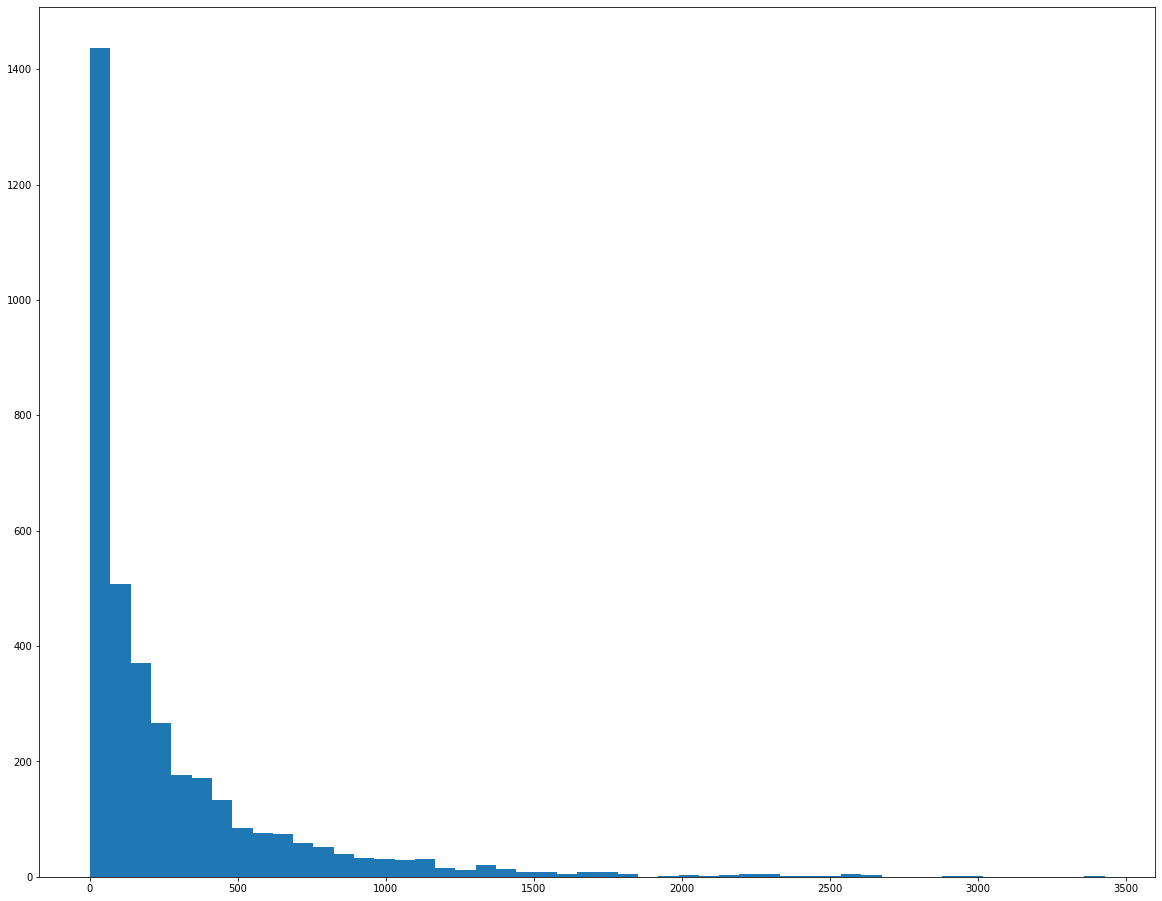

In [33]:
plt.hist(movie_rating_count.values,bins=50)
plt.show()

In [34]:
movie_df['movie_id'].nunique()

3883

In [35]:
movie_rating_count[movie_rating_count<100].size

1687

In [36]:
len(movie_rating_count[movie_rating_count<100])

1687

## 영화 별 평균 평점 탐색
- DataFrameGroupBy.mean()메소드
    -각 그룹에 속한(결측치를 제외한) 값의 평균을 반환

In [37]:
movie_rating_mean = rating_df.groupby('movie_id')['rating'].mean()
movie_rating_mean.head(20)

movie_id
1     4.146846
2     3.201141
3     3.016736
4     2.729412
5     3.006757
6     3.878723
7     3.410480
8     3.014706
9     2.656863
10    3.540541
11    3.793804
12    2.362500
13    3.262626
14    3.542484
15    2.458904
16    3.793255
17    4.027545
18    3.337580
19    2.480720
20    2.537500
Name: rating, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

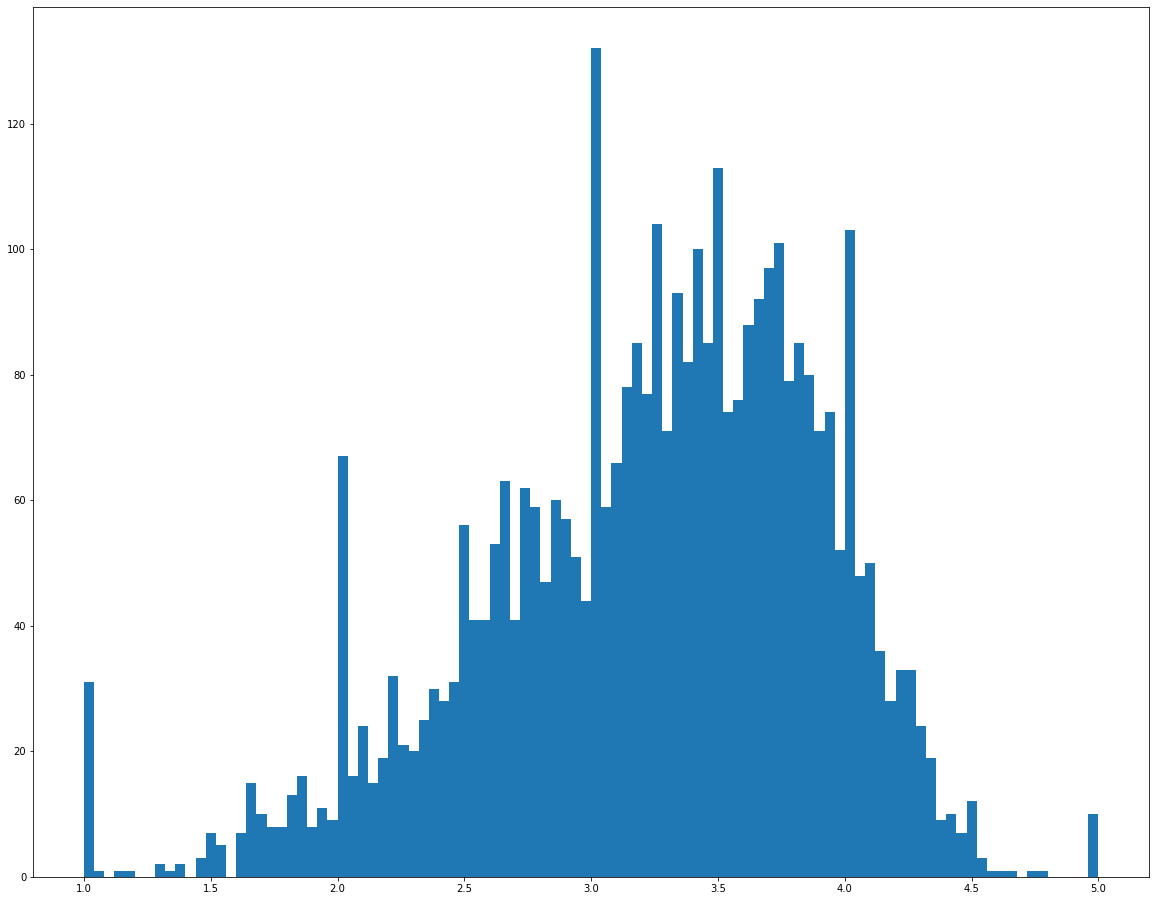

In [38]:
plt.hist(movie_rating_mean.values,bins=100)
plt.show

In [39]:
rating_df.describe()

,user_id,movie_id,rating,time
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


## 영화 별 평균 평점 탐색
- DataFrameGroupBy.agg()메소드
    - 각 그룹에 여러 개의 연산을 적용한 결과를 반환
- DataFrame.rename() 메소드
    - 데이터프레임 객체의 열 제목을 ㅂㄴ경
    - columns:dict-like or function
    - inplace =False

In [40]:
movie_rating_info = rating_df.groupby('movie_id')['rating'].agg(['count','mean','std'])

In [41]:
movie_rating_info

,count,mean,std
movie_id,,,
1,2077,4.146846,0.852349
2,701,3.201141,0.983172
3,478,3.016736,1.071712
4,170,2.729412,1.013381
5,296,3.006757,1.025086
...,...,...,...
3948,862,3.635731,1.014196
3949,304,4.115132,1.009804
3950,54,3.666667,1.046107


<function matplotlib.pyplot.show(close=None, block=None)>

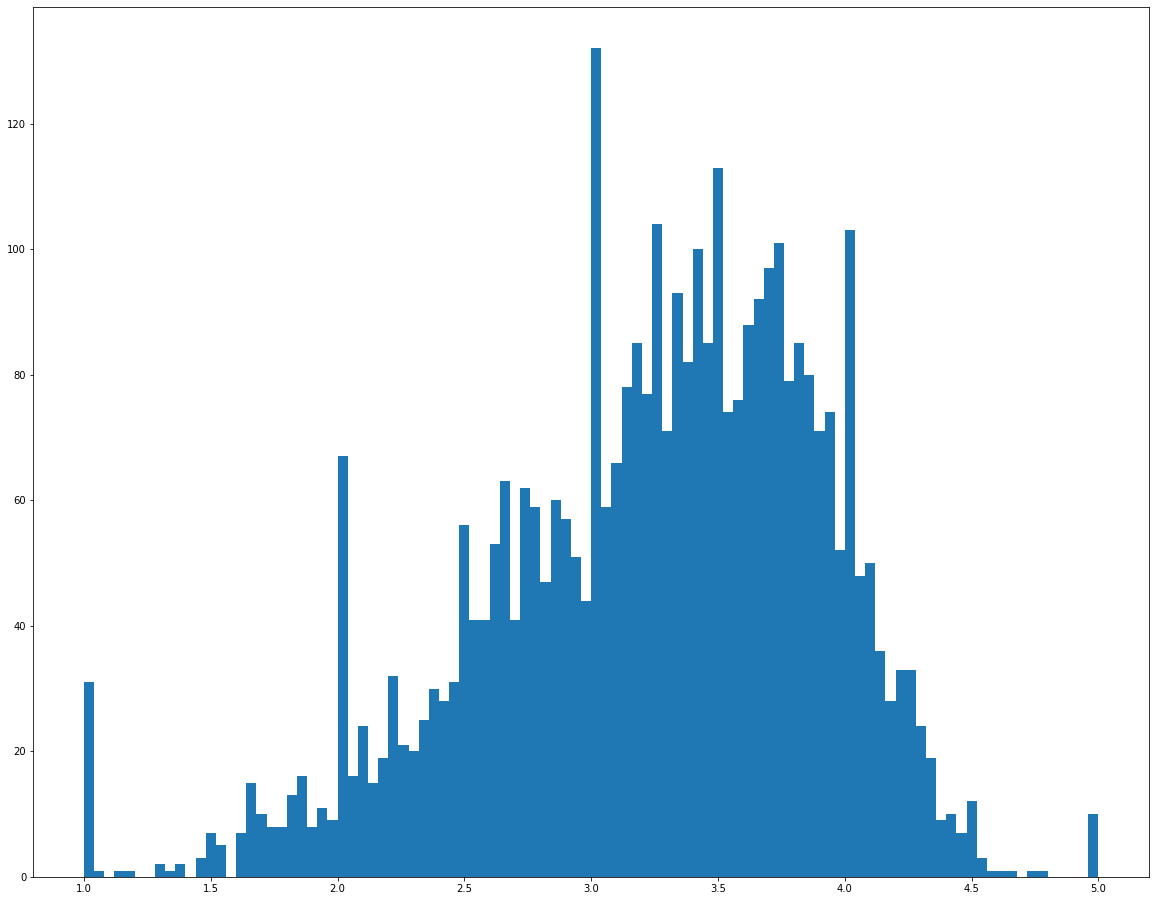

In [42]:
plt.hist(movie_rating_info['mean'],bins=100)
plt.show

In [43]:
movie_rating_info.rename(columns = lambda x: 'rating_'+x,inplace=True)

In [44]:
movie_rating_info.head()

,rating_count,rating_mean,rating_std
movie_id,,,
1,2077,4.146846,0.852349
2,701,3.201141,0.983172
3,478,3.016736,1.071712
4,170,2.729412,1.013381
5,296,3.006757,1.025086


## 사용자 별 평가한 영화 개수 탐색
- 평점 데이터에서 사용자 별로 평점 횟수를 계수
- 가장 많은 평가를 한 사용자 정보 탐색
- Series.sort_values() 메소드
    - 시리즈 객체의 값을 정렬
    - ascending =True
    - inplace = False
- Series.idxmax() 메소드
    - 최댓값을 갖는 인덱스를 반환

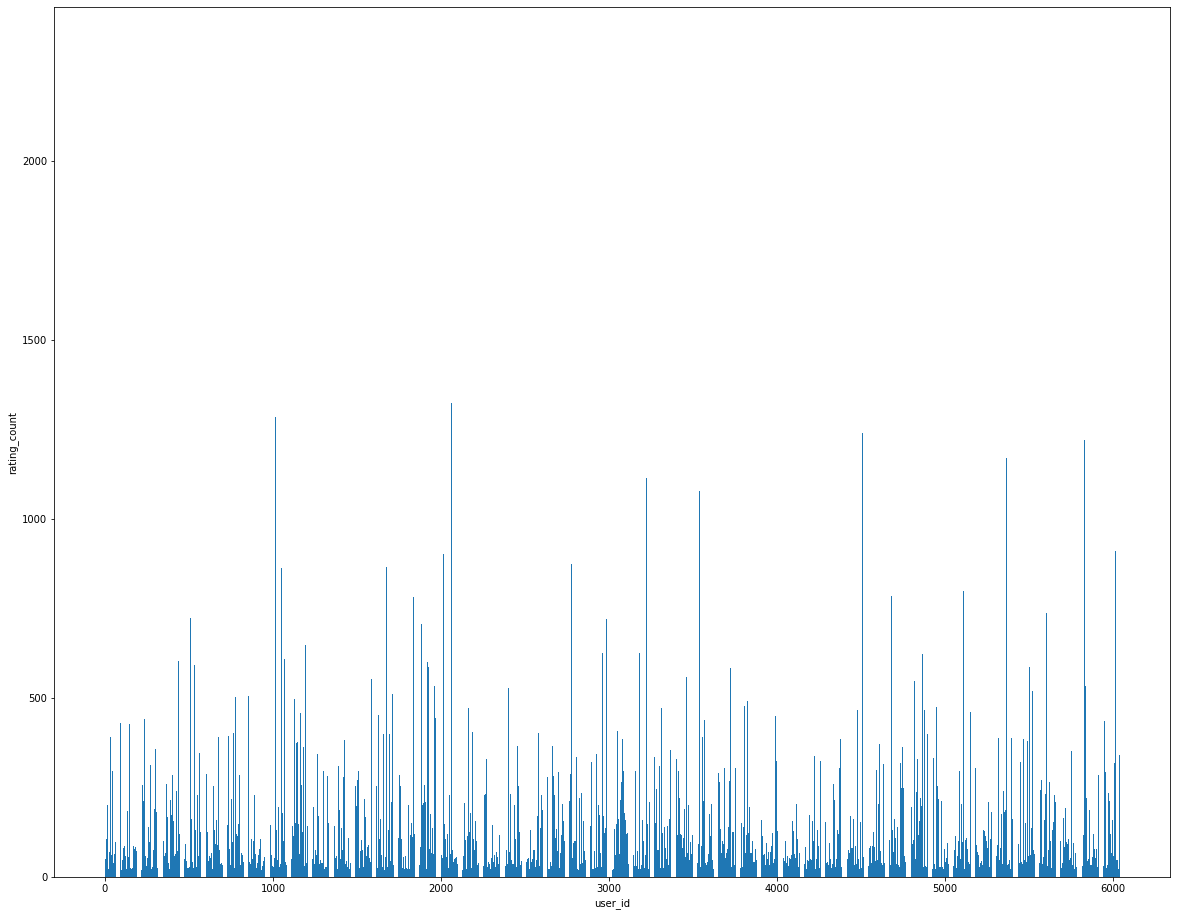

In [45]:
user_rating_count = rating_df.groupby('user_id')['rating'].count()

plt.bar(user_rating_count.index,user_rating_count.values)
plt.xlabel('user_id')
plt.ylabel('rating_count')
plt.show()

In [46]:
user_rating_count.sort_values(ascending=False)

user_id
4169    2314
1680    1850
4277    1743
1941    1595
1181    1521
        ... 
5725      20
3407      20
1664      20
4419      20
3021      20
Name: rating, Length: 6040, dtype: int64

In [47]:
user_df[user_df['user_id']==4169]

,user_id,gender,age,occupation,zipcode,age_group
4168,4169,M,50,0,66048,50


In [48]:
top_user_id = user_rating_count.idxmax()
user_df[user_df['user_id']==top_user_id]

,user_id,gender,age,occupation,zipcode,age_group
4168,4169,M,50,0,66048,50


In [49]:
movie_df[movie_df['movie_id']==787]

,movie_id,title,genre,year,years
777,787,"Gate of Heavenly Peace, The",Documentary,1995,1990


In [52]:
movie_rating_info.loc[787]

rating_count    3.0
rating_mean     5.0
rating_std      0.0
Name: 787, dtype: float64

In [57]:
user_rating_info = rating_df.groupby('user_id')['rating'].agg(['mean','std'])
user_rating_info.rename(columns={'mean':'rating_mean','std':'rating_std'},inplace =True)
user_rating_info.head()

,rating_mean,rating_std
user_id,,
1,4.188679,0.680967
2,3.713178,1.001513
3,3.901961,0.984985
4,4.190476,1.077917
5,3.146465,1.132699


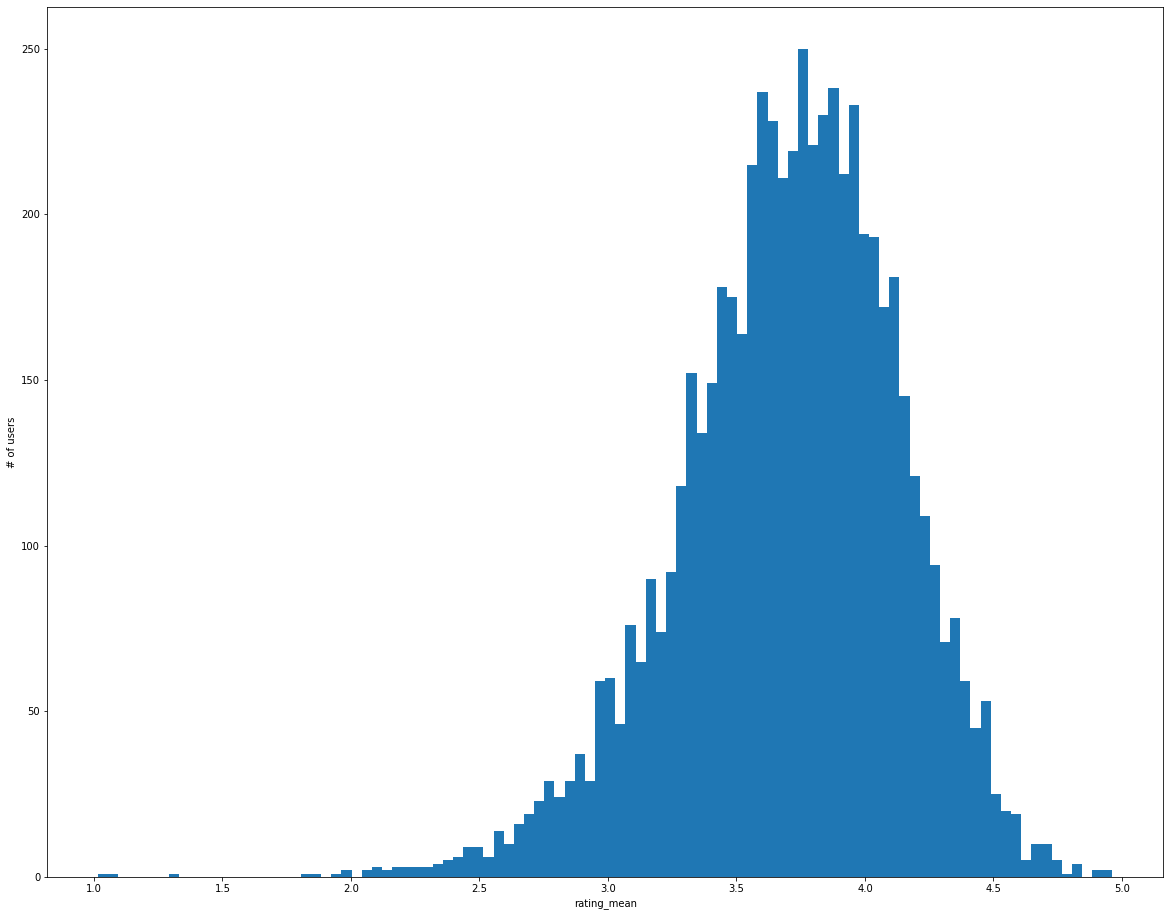

In [59]:
plt.hist(user_rating_info['rating_mean'].values,bins=100)
plt.xlabel('rating_mean')
plt.ylabel('# of users')
plt.show()

In [61]:
rating_df.describe()

,user_id,movie_id,rating,time
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [62]:
user_rating_info

,rating_mean,rating_std
user_id,,
1,4.188679,0.680967
2,3.713178,1.001513
3,3.901961,0.984985
4,4.190476,1.077917
5,3.146465,1.132699
...,...,...
6036,3.302928,1.023684
6037,3.717822,0.877910
6038,3.800000,1.105013


## 사용자와 영화 간 평점 행렬 생성
- DataFrame.set_index ()메소드
    - 열 제목을 데이터프레임 인덱스로 설정
    - keys:label or array-like
    - drop = True
    - inplace = False
- DataFrame.unstack() 메소드
    - 인덱스 라벨의 레벨로 데이터프레임을 변형
    - level = -1 
    - fill_value=None

In [64]:
rating_df.head()

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [67]:
rating_df[['user_id','movie_id','rating']].head()

,user_id,movie_id,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [71]:
rating_df[['user_id','movie_id','rating']].set_index(['user_id','movie_id']).head(10)

rating
user_id movie_id        
1       1193           5
        661            3
        914            3
        3408           4
        2355           5
        1197           3
        1287           5
        2804           5
        594            4
        919            4

In [73]:
um_rating_df = rating_df[['user_id','movie_id','rating']].set_index(['user_id','movie_id'])
um_rating_df.head()

rating
user_id movie_id        
1       1193           5
        661            3
        914            3
        3408           4
        2355           5

In [81]:
um_rating_df.unstack(-1)

rating                                               ...            \
movie_id   1    2    3    4    5    6    7    8    9    10    ... 3943 3944   
user_id                                                       ...             
1           5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
2           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
3           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
4           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
5           NaN  NaN  NaN  NaN  NaN  2.0  NaN  NaN  NaN  NaN  ...  NaN  NaN   
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
6036        NaN  NaN  NaN  2.0  NaN  3.0  NaN  NaN  NaN  NaN  ...  NaN  NaN   
6037        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
6038        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
6039        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
6040        3.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   

                                                  
movie_id 3945 3946 3947 3948 3949 3950 3951 3952  
user_id                                           
1         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
...       ...  ...  ...  ...  ...  ...  ...  ...  
6036      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6037      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6038      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6039      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6040      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[6040 rows x 3706 columns]

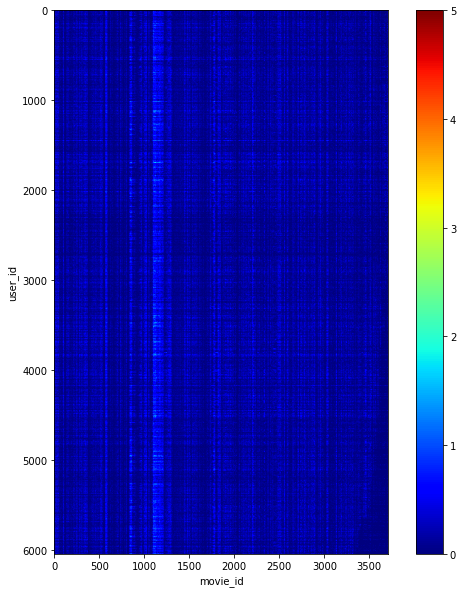

In [92]:
rating_table = um_rating_df.unstack(fill_value=0)

plt.figure(figsize=(10,10))
plt.imshow(rating_table,cmap='jet') # show image
plt.colorbar()
plt.xlabel('movie_id')
plt.ylabel('user_id')
plt.show()

## 사용자와 영화 간 평점 행렬 시각화
- pyplot.imshow()
    - 2차원 배열을 시각화
- 희소행렬(sparse matrix)
    - 행렬의 원소가 대부분 0인 행렬
    - 6040 명* 3883 편 =23,453,320 건
    - 1,000,209 건 (약 4%)
- 행렬 완성( matrix completion)
    - 행렬의 빈 공간을 채우는 알고리즘
    - 행렬 분해(matrix factorization)으로 구현(SVD)

## pandas
- series 클래스
    - unique() , nunique() , value_counts() -sort 기본 , sort_index() , sort_values() , idxmax() , rename()
- DataFrame 클래스
    - groupby() , rename() , set_index() , unstack()
- DataFrameGroupBy 클래스
    - apply() , agg() ,  count() , mean() , std()   

## matplolib
- pyplot 모듈
    - bar() - 막대
    - hist() - 히스토그램
    - imshow() - 그림

# 예측 : 수학적 기법을 활용해 평점 예측하기
- SVD 모델 학습
- 예측 평점이 높은 영화 추천하기

## 행렬 분해 (matrix factorization)
- 수학적 성질을 이용하여 하나의 행렬을 여러 행렬의 곱으로 나타내는 작업
- 특이값 분해(SVD : singular value decomposition)
    - m * n의 행렬 A를 3개의 행렬  U(직교행렬 m * r), S(대각행렬 r * r), V(직교행렬 r * n)로 분해
    - 행렬 U, S, V로부터 행렬 A를 근사한 행렬 A'을 계산하여 행렬 완성을 수행

## SVD알고리즘
1. 행렬 U,S,V를 임의의 실수(랜덤:무작위)로 초기화
2. 행렬 U,S,V를 곱하여 새로운 행렬 A'를 계산
3. 새로운 행렬 A'를 계산 행렬 A의 값을 비교하여 행렬 U,S,V의 원소를 업데이트(SGD :확률적 경사 하강법)
4. 새로운 행렬 A' 과 행렬 A의 값이 최대한 비슷해질 때까지 2번, 3번의 과정을 반복(이포크)

## surprise 라이브러리
- 추천 시스템 구축 및 분석을 위한 scikit 라이브러리
- 베이스라인 , 최근접이웃, 행렬 분해(SVD, NMF) 모델 제공
- MovieLens, Jester 등의 빌트 -인 데이터셋 제공
- !pip install surprise


In [96]:
!pip install surprise

You should consider upgrading via the 'c:\users\smjsi\anaconda3\envs\xb00036\python.exe -m pip install --upgrade pip' command.


## MovieLens 데이터셋 준비
- surprise 라이브러리에서의 데이터셋은 user_id(사용자), item_id(영화, 쇼핑물상품), rating(평점) 순으로 구성되어야함
- Reader 클래스
    - surprise.reader 패키지
    - 평점을 포함하는 데이터 파일을 파싱
    - rating_scale =(1,5): 모든 평점의 범위
- Dataset 클래스
    - surprise.dataser 모듈
    - 데이터셋 로딩의 베이스 클래스
    - load_from_df()클래스 메소드
        - df: 데이터프레임
        - reader : Reader객체

In [103]:
from surprise import Reader, Dataset

reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(rating_df[['user_id','movie_id','rating']],reader)

## 훈련 데이터셋과 테스트 데이터셋 분할
- train_test_split()함수
    - surprise.model_selection 패키지
    - 데이터셋을 훈련 데이터셋과 테스트 데이터 셋으로 분할
    - test_size = 0.2 : 테스트 데이터셋 비율
    - random_state =None : 랜덤 시드
    - shuffle = True : 데이터 섞기 여부

In [105]:
from surprise.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.2,random_state=42)

In [106]:
train_data

In [109]:
type(test_data)

list

## SVD 모델 훈련
- SVD 클래스
    - surprise.prediction_algorighm.<br>
      matrix_factorization 패키지
    - n_factors =20 =팩터의 개수(중요)
    - n_epochs =100 : 훈련 개수
    - lr_all =0.005 : 학습률
    - random_state =None 
    _ fit() 메소드
        - 입력 데이터로 모델을 훈련

In [110]:
from surprise import SVD

model = SVD(random_state =42)
model.fit(train_data)

## 영화를 추천할 사용자의 기존 평점 데이터 추출
- 전체 평점 데이터로부터 특정 사용자의 평점 데이터만 추출하여 딕셔너리 객체로 저장

In [111]:
test_user_id =4 
test_user_rating_df = rating_df[rating_df['user_id']==test_user_id] #불리언 인덱싱
test_user_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 233 to 253
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   user_id   21 non-null     int64
 1   movie_id  21 non-null     int64
 2   rating    21 non-null     int64
 3   time      21 non-null     int64
dtypes: int64(4)
memory usage: 840.0 bytes


In [112]:
test_user_rating_df.head()

,user_id,movie_id,rating,time
233,4,3468,5,978294008
234,4,1210,3,978293924
235,4,2951,4,978294282
236,4,1214,4,978294260
237,4,1036,4,978294282


In [130]:
test_user_rating_dict = {}

for _,row in test_user_rating_df.iterrows():
    movie_id = row['movie_id']
    rating = row['rating']
    test_user_rating_dict[movie_id] = rating

test_user_rating_dict

{3468: 5,
 1210: 3,
 2951: 4,
 1214: 4,
 1036: 4,
 260: 5,
 2028: 5,
 480: 4,
 1196: 2,
 1198: 5,
 1954: 5,
 1097: 4,
 3418: 4,
 3702: 4,
 2366: 4,
 1387: 5,
 3527: 1,
 1201: 5,
 2692: 5,
 2947: 5,
 1240: 5}

## 특정 사용자가 평가하지 않은 영화 목록 생성
- 무비 데이터에서 특정 사용자가 평가하지 않은 영화 목록 생성
    - 평점 목록에 없는 경우 리스트에 추가
    - 리스트의 원소는 (uid, lid, r_ui)으로 구성
        - uid:usert_id
        - lid : item_id
        - r_id : true rating (의미 없음)

In [137]:
test_user_unrated_movies = []

for _, row in movie_df.iterrows():
    movie_id =row['movie_id']
    rating = 0
    if movie_id in test_user_rating_dict:
        continue
    test_user_unrated_movies.append((test_user_id, movie_id, rating))
    
test_user_unrated_movies[:10]

[(4, 1, 0),
 (4, 2, 0),
 (4, 3, 0),
 (4, 4, 0),
 (4, 5, 0),
 (4, 6, 0),
 (4, 7, 0),
 (4, 8, 0),
 (4, 9, 0),
 (4, 10, 0)]

## 영화 평점 예측 및 정렬
- SVD 클래스
    - test() 메소드 
        - 입력 데이터에 대한 예측 결과를 반환 
        - uid, lid, r_ui = 넣은 값 est = 예측치

In [141]:
test_user_predictions = model.test(test_user_unrated_movies)
test_user_predictions[:5]

[Prediction(uid=4, iid=1, r_ui=0, est=4.09688727743794, details={'was_impossible': False}),
 Prediction(uid=4, iid=2, r_ui=0, est=3.4117297281452403, details={'was_impossible': False}),
 Prediction(uid=4, iid=3, r_ui=0, est=3.1930007683493895, details={'was_impossible': False}),
 Prediction(uid=4, iid=4, r_ui=0, est=3.0017806494686354, details={'was_impossible': False}),
 Prediction(uid=4, iid=5, r_ui=0, est=3.1084234528835943, details={'was_impossible': False})]

In [146]:
test_user_predicted_rating_dict = {}

for _, movie_id, _, predicted_rating, _ in test_user_predictions:
    test_user_predicted_rating_dict[movie_id] = predicted_rating

In [148]:
test_user_predicted_rating_dict

{1: 4.09688727743794,
 2: 3.4117297281452403,
 3: 3.1930007683493895,
 4: 3.0017806494686354,
 5: 3.1084234528835943,
 6: 3.829756740451222,
 7: 3.206699420353713,
 8: 3.4965446175420065,
 9: 2.868651496312039,
 10: 3.739056635667237,
 11: 3.837128633294278,
 12: 2.731942402735499,
 13: 3.515919231501918,
 14: 3.8334068929712872,
 15: 2.8783623897438066,
 16: 3.981371258848737,
 17: 4.1749083360295485,
 18: 3.574470005295118,
 19: 2.59161864232805,
 20: 2.687033471237365,
 21: 3.810939416645211,
 22: 3.562144279352987,
 23: 3.132651988790237,
 24: 3.263648956804695,
 25: 3.7326398704426658,
 26: 3.912583324830253,
 27: 3.3281996132798635,
 28: 4.299193723685695,
 29: 3.794917875469919,
 30: 4.002020628880339,
 31: 3.166017864653546,
 32: 4.058061875776347,
 33: 3.4883584147484985,
 34: 3.8611123309676705,
 35: 3.5414734560063152,
 36: 4.1940043809530225,
 37: 3.865861157681738,
 38: 3.102095561077352,
 39: 3.7192635586232745,
 40: 3.905340028537711,
 41: 3.9045812969098406,
 42: 3.1179

In [156]:
import operator 

test_user_prediced_rating = sorted(test_user_predicted_rating_dict.items(),key=operator.itemgetter(1),reverse =True)

## 추천 영화 출력
- 예측 평점이 높은 영화 10편을 예측 평점과 함께 출력

In [157]:
movie_df.head()

,movie_id,title,genre,year,years
0,1,Toy Story,Animation|Children's|Comedy,1995,1990
1,2,Jumanji,Adventure|Children's|Fantasy,1995,1990
2,3,Grumpier Old Men,Comedy|Romance,1995,1990
3,4,Waiting to Exhale,Comedy|Drama,1995,1990
4,5,Father of the Bride Part II,Comedy,1995,1990


In [158]:
movie_dict = {}

for _, row in movie_df.iterrows():
    movie_id = row ['movie_id']
    movie_dict[movie_id]=row['title']
    
movie_dict

{1: 'Toy Story',
 2: 'Jumanji',
 3: 'Grumpier Old Men',
 4: 'Waiting to Exhale',
 5: 'Father of the Bride Part II',
 6: 'Heat',
 7: 'Sabrina',
 8: 'Tom and Huck',
 9: 'Sudden Death',
 10: 'GoldenEye',
 11: 'American President, The',
 12: 'Dracula: Dead and Loving It',
 13: 'Balto',
 14: 'Nixon',
 15: 'Cutthroat Island',
 16: 'Casino',
 17: 'Sense and Sensibility',
 18: 'Four Rooms',
 19: 'Ace Ventura: When Nature Calls',
 20: 'Money Train',
 21: 'Get Shorty',
 22: 'Copycat',
 23: 'Assassins',
 24: 'Powder',
 25: 'Leaving Las Vegas',
 26: 'Othello',
 27: 'Now and Then',
 28: 'Persuasion',
 29: 'City of Lost Children, The',
 30: 'Shanghai Triad (Yao a yao yao dao waipo qiao)',
 31: 'Dangerous Minds',
 32: 'Twelve Monkeys',
 33: 'Wings of Courage',
 34: 'Babe',
 35: 'Carrington',
 36: 'Dead Man Walking',
 37: 'Across the Sea of Time',
 38: 'It Takes Two',
 39: 'Clueless',
 40: 'Cry, the Beloved Country',
 41: 'Richard III',
 42: 'Dead Presidents',
 43: 'Restoration',
 44: 'Mortal Kombat',

In [160]:
for pred in test_user_prediced_rating[:10]:
    movie_id = pred[0]
    predicted_rating = pred[1]
    print(f'{movie_dict[movie_id]} :{predicted_rating:2f}')

Yojimbo :4.751373
Boat, The (Das Boot) :4.721158
Sanjuro :4.687629
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) :4.605142
Schindler's List :4.582830
Wrong Trousers, The :4.570965
Patton :4.564766
Godfather, The :4.564668
General, The :4.551194
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb :4.550764


# 평가: 예측 모델 평가하기
- 평점 예측 모델 평가
- 하이퍼파라미터 튜닝
- 실제 평점과 예측 평점의 비교

## 과연 이 예측이 얼마나 정확한 예측일까?
- 행렬 완성 문제의 일반적인 평가 척도는 RMSE
- rmse() 함수
    - surprise.accuracy 모듈
    - test() 함수 호출로 반환된 예측에 대한 RMSE를 반환

In [162]:
test_data[:10]

[(1841, 3717, 1.0),
 (3715, 880, 3.0),
 (2002, 3072, 4.0),
 (3332, 2734, 3.0),
 (3576, 631, 3.0),
 (2092, 3247, 3.0),
 (5283, 2643, 1.0),
 (4610, 2124, 3.0),
 (398, 3176, 4.0),
 (4533, 357, 4.0)]

In [165]:
test_result = model.test(test_data)
test_result[:10]

[Prediction(uid=1841, iid=3717, r_ui=1.0, est=2.2449976403111234, details={'was_impossible': False}),
 Prediction(uid=3715, iid=880, r_ui=3.0, est=2.3409641615799037, details={'was_impossible': False}),
 Prediction(uid=2002, iid=3072, r_ui=4.0, est=4.162753727349445, details={'was_impossible': False}),
 Prediction(uid=3332, iid=2734, r_ui=3.0, est=3.5813623831381483, details={'was_impossible': False}),
 Prediction(uid=3576, iid=631, r_ui=3.0, est=2.364333134477365, details={'was_impossible': False}),
 Prediction(uid=2092, iid=3247, r_ui=3.0, est=2.7021717901846625, details={'was_impossible': False}),
 Prediction(uid=5283, iid=2643, r_ui=1.0, est=1.709113929542525, details={'was_impossible': False}),
 Prediction(uid=4610, iid=2124, r_ui=3.0, est=3.368837123993786, details={'was_impossible': False}),
 Prediction(uid=398, iid=3176, r_ui=4.0, est=3.6921150923618984, details={'was_impossible': False}),
 Prediction(uid=4533, iid=357, r_ui=4.0, est=3.5262583411384347, details={'was_impossible

In [167]:
from surprise import accuracy

accuracy.rmse(test_result)

RMSE: 0.8729


0.8728931555711223

## 하이퍼파라미터 튜닝 (hyperparameter tuning)
- 하이퍼파라미터
    - 모델이 학습할 수 없어서 사용자가 지정해야 하는 피라미터
    - 머신러닝 모델을 사용할 때 클래스나 메소드의 매개변수로 표현
        - ex) SVD 모델의 n_factors, lr_all, reg_all, n_epochs 등
- 하이퍼파라미터 튜닝
    - 검증 세트(테스트 세트)의 점수나 교차 검증을 통해 좋은 성능(RMSE이 낮을 수록)을 갖는 모델의 하이퍼파라미터 최적값을 찾는 과정

## 최적의 n_factors 찾기
- n_factors 값을 변경하면서 모델을 학습하여 RMSE를 계산하여 분석

In [169]:
rmse_ = []

for n_factors in range(10,101,10): 
    model =SVD(n_factors=n_factors, random_state =42)
    model.fit(train_data)
    rmse_.append(accuracy.rmse(model.test(test_data)))
    

RMSE: 0.8738
RMSE: 0.8731
RMSE: 0.8698
RMSE: 0.8714
RMSE: 0.8706
RMSE: 0.8715
RMSE: 0.8721
RMSE: 0.8729
RMSE: 0.8724
RMSE: 0.8729


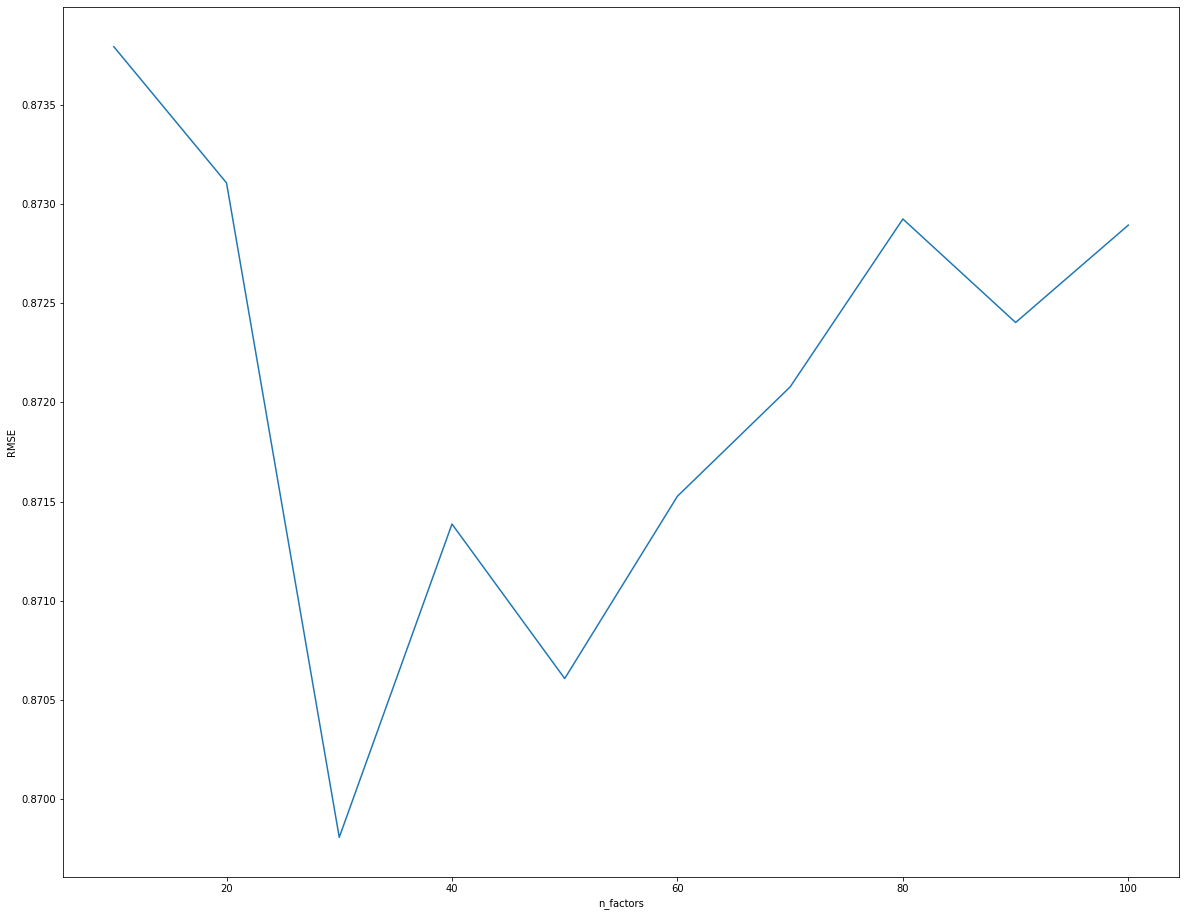

In [170]:
plt.plot(range(10,101,10),rmse_)
plt.xlabel('n_factors')
plt.ylabel('RMSE')
plt.show()

## 실제 평점과 예측 평점 비교하기
- n_factors =40 으로 설정하여 SVD 모델을 훈련
- test() 함수의 입력 데이터 형식으로 특정 사용자의 실제 평점 데이터 리스트를 생성

In [171]:
model =SVD(n_factors=30, random_state =42)
model.fit(train_data)

In [178]:
test_user_rated_movies = []

for movie_id, rating in test_user_rating_dict.items():
    test_user_rated_movies.append((test_user_id, movie_id, rating))

test_user_rated_movies

[(4, 3468, 5),
 (4, 1210, 3),
 (4, 2951, 4),
 (4, 1214, 4),
 (4, 1036, 4),
 (4, 260, 5),
 (4, 2028, 5),
 (4, 480, 4),
 (4, 1196, 2),
 (4, 1198, 5),
 (4, 1954, 5),
 (4, 1097, 4),
 (4, 3418, 4),
 (4, 3702, 4),
 (4, 2366, 4),
 (4, 1387, 5),
 (4, 3527, 1),
 (4, 1201, 5),
 (4, 2692, 5),
 (4, 2947, 5),
 (4, 1240, 5)]

In [180]:
test_user_rated_movies_predictions =model.test(test_user_rated_movies)

In [192]:
movie_ids = []
true_ratings =[]
pred_ratings =[]

for _, movie_id, true_rating, pred_rating,_ in test_user_rated_movies_predictions: 
    title = movie_dict[movie_id]
    movie_ids.append(movie_id)
    true_ratings.append(true_rating)
    pred_ratings.append(pred_rating)
    print(f'{title}:{true_rating:.2f}/{pred_rating:.2f}')

Hustler, The:5.00/4.27
Star Wars: Episode VI - Return of the Jedi:3.00/3.78
Fistful of Dollars, A:4.00/4.18
Alien:4.00/3.96
Die Hard:4.00/4.02
Star Wars: Episode IV - A New Hope:5.00/4.34
Saving Private Ryan:5.00/4.48
Jurassic Park:4.00/3.46
Star Wars: Episode V - The Empire Strikes Back:2.00/4.08
Raiders of the Lost Ark:5.00/4.28
Rocky:5.00/3.86
E.T. the Extra-Terrestrial:4.00/3.87
Thelma & Louise:4.00/3.90
Mad Max:4.00/3.68
King Kong:4.00/3.80
Jaws:5.00/4.20
Predator:1.00/3.45
Good, The Bad and The Ugly, The:5.00/4.30
Run Lola Run (Lola rennt):5.00/4.01
Goldfinger:5.00/3.98
Terminator, The:5.00/3.87


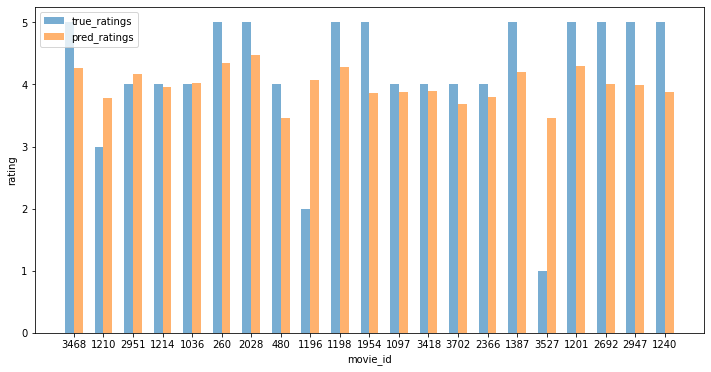

In [200]:
import numpy as np

index = np.arange(len(movie_ids))

plt.figure(figsize=(12,6))
plt.bar(index - 0.15, true_ratings, width =0.3,alpha=0.6,label ='true_ratings')
plt.bar(index + 0.15, pred_ratings,   width =0.3,alpha=0.6,label ='pred_ratings')
plt.xlabel('movie_id')
plt.ylabel('rating')
plt.xticks(index,movie_ids)
plt.legend()
plt.show()

# 핵심 클래스와 메소드, 함수
- surprise 라이브러리
    - Reader 클래스
    - Dataset 클래스
    - model_selection 패키지
        - train_test_split() 함수
    - SVD 클래스
        - fit() 메소드
        - test() 메소드
    - accuracy 모듈
        - rmse() 함수